In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


In [2]:
# import data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"
df = pd.read_csv(url, na_values='?', comment='\t',sep=',',skipinitialspace=True, engine='python')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.columns = ["Age", "Anaemia", "CPK","Diabetes","EjectionFraction", "HighBP", "Platelets", "Creatinine","Sodium","Gender","Smoking","F/UPeriod","DEATH_EVENT"]

In [6]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<ipython-input-7-da03fdfe56aa>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="DEATH_EVENT", data=df, palette="bwr")


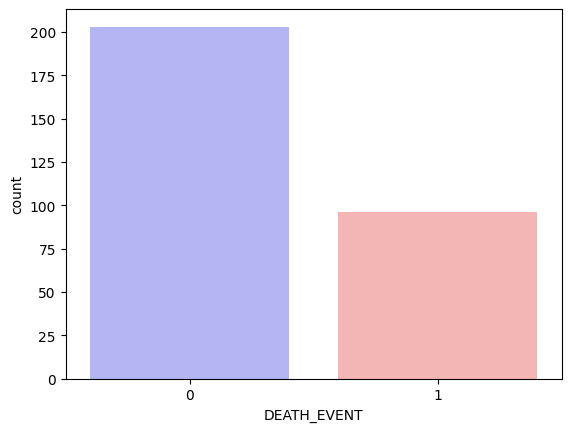

In [7]:
sns.countplot(x="DEATH_EVENT", data=df, palette="bwr")
plt.show()

In [8]:
countSurvivedPatients = len(df[df.DEATH_EVENT == 0])
countDeadPatients = len(df[df.DEATH_EVENT == 1])
print("Percentage of Survived Patients : {:.2f}%".format((countSurvivedPatients / (len(df.DEATH_EVENT))*100)))
print("Percentage of Dead Patients: {:.2f}%".format((countDeadPatients / (len(df.DEATH_EVENT))*100)))

Percentage of Survived Patients : 67.89%
Percentage of Dead Patients: 32.11%


<ipython-input-9-0208c2a4c81d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette="mako_r")


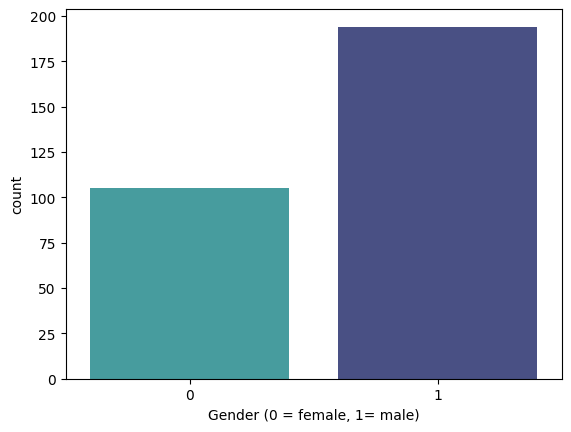

In [9]:
sns.countplot(x='Gender', data=df, palette="mako_r")
plt.xlabel("Gender (0 = female, 1= male)")
plt.show()

In [10]:
countFemale = len(df[df.Gender == 0])
countMale = len(df[df.Gender == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.Gender))*100)))

Percentage of Female Patients: 35.12%
Percentage of Male Patients: 64.88%


In [11]:
df.groupby('DEATH_EVENT').mean()

,Age,Anaemia,CPK,Diabetes,EjectionFraction,HighBP,Platelets,Creatinine,Sodium,Gender,Smoking,F/UPeriod
DEATH_EVENT,,,,,,,,,,,,
0,58.761906,0.408867,540.054187,0.418719,40.26601,0.325123,266657.489901,1.184877,137.216749,0.650246,0.325123,158.339901
1,65.215281,0.479167,670.197917,0.416667,33.46875,0.406250,256381.044792,1.835833,135.375000,0.645833,0.312500,70.885417


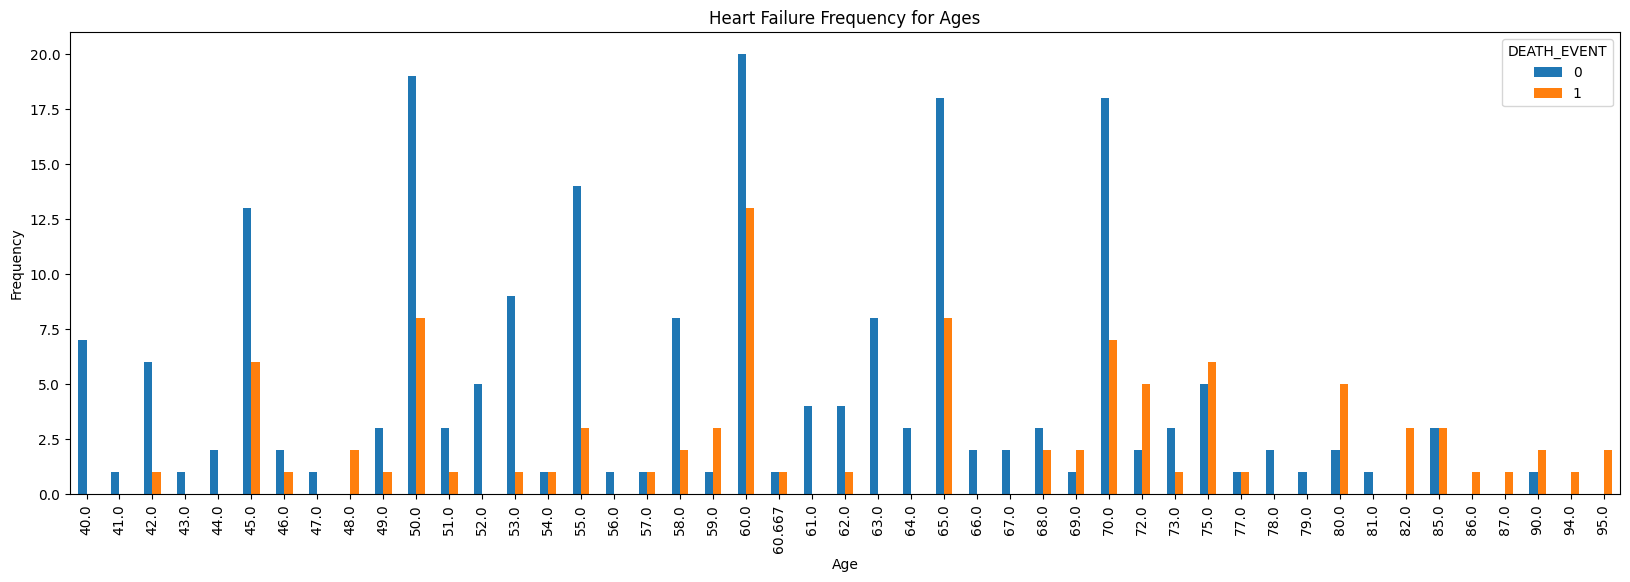

In [12]:
pd.crosstab(df.Age,df.DEATH_EVENT).plot(kind="bar",figsize=(20,6))
plt.title('Heart Failure Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('HeartFailureAndAges.png')
plt.show()

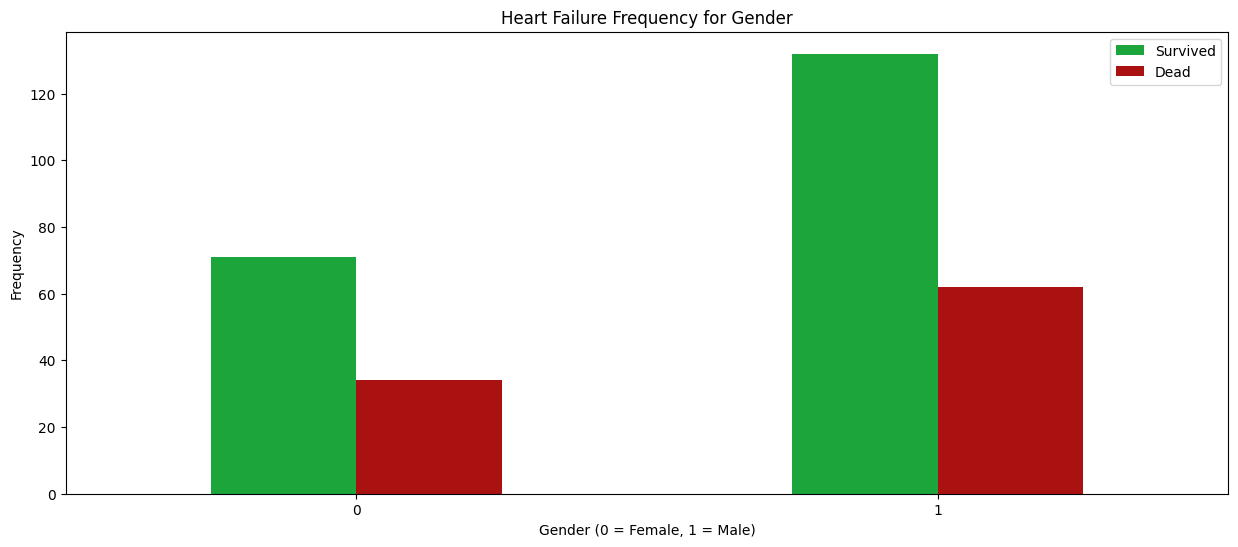

In [13]:
pd.crosstab(df.Gender,df.DEATH_EVENT).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Failure Frequency for Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Survived", "Dead"])
plt.ylabel('Frequency')
plt.show()

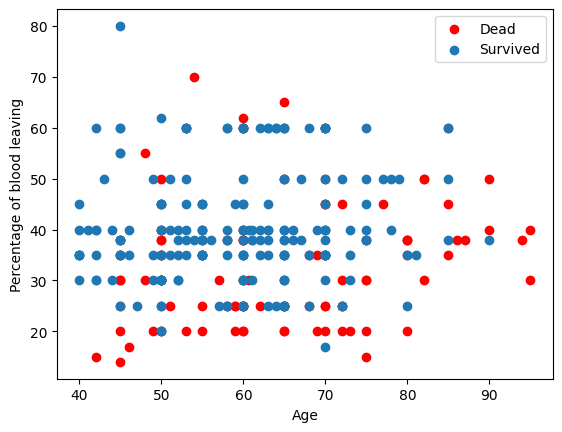

In [14]:
plt.scatter(x=df.Age[df.DEATH_EVENT==1], y=df.EjectionFraction[(df.DEATH_EVENT==1)], c="red")
plt.scatter(x=df.Age[df.DEATH_EVENT==0], y=df.EjectionFraction[(df.DEATH_EVENT==0)])
plt.legend(["Dead", "Survived"])
plt.xlabel("Age")
plt.ylabel("Percentage of blood leaving")
plt.show()

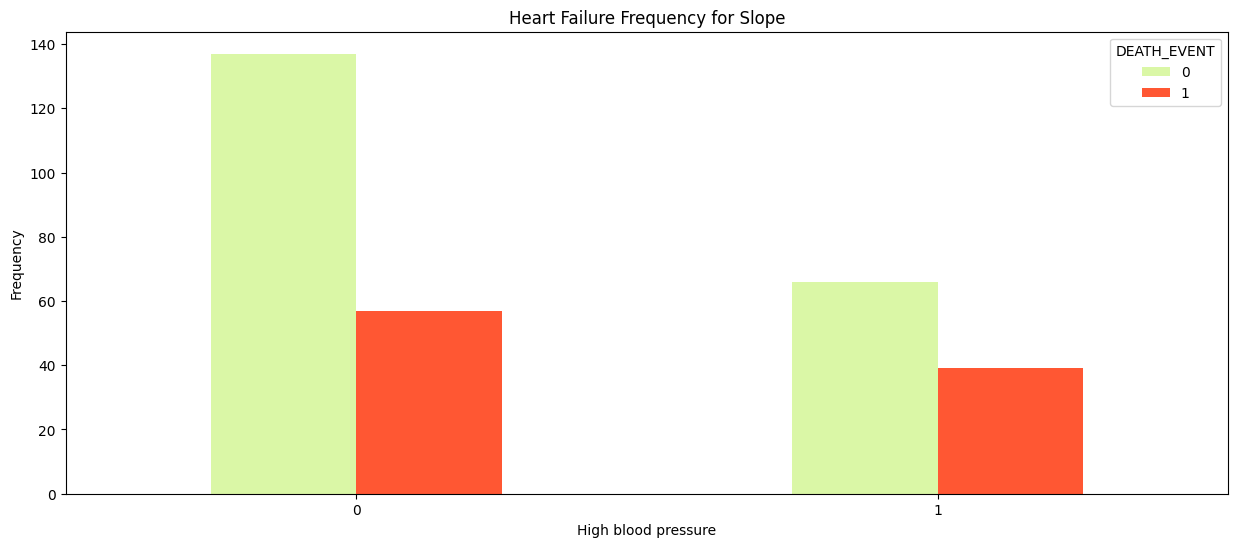

In [15]:
pd.crosstab(df.HighBP,df.DEATH_EVENT).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733'])
plt.title('Heart Failure Frequency for Slope')
plt.xlabel('High blood pressure')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

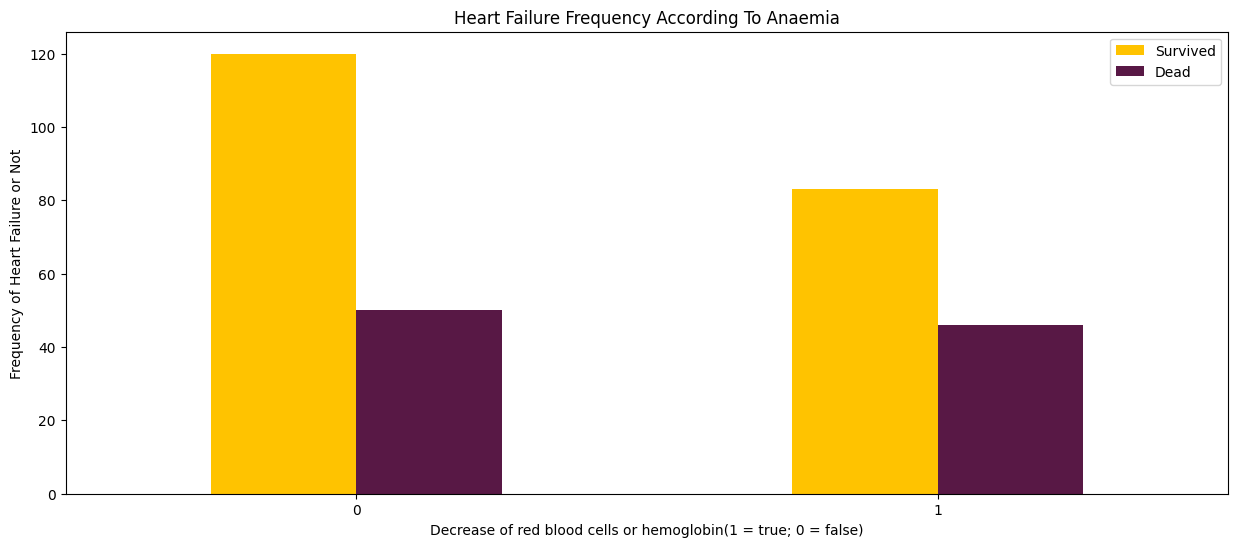

In [16]:
pd.crosstab(df.Anaemia,df.DEATH_EVENT).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Failure Frequency According To Anaemia')
plt.xlabel('Decrease of red blood cells or hemoglobin(1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Survived", "Dead"])
plt.ylabel('Frequency of Heart Failure or Not')
plt.show()

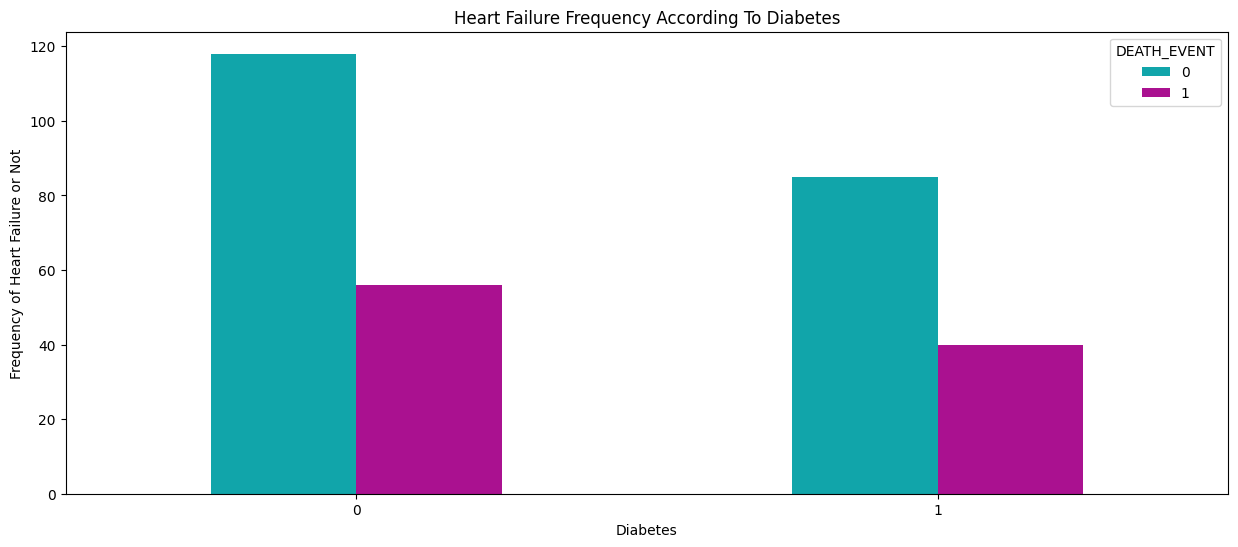

In [17]:
pd.crosstab(df.Diabetes,df.DEATH_EVENT).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Failure Frequency According To Diabetes')
plt.xlabel('Diabetes')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Heart Failure or Not')
plt.show()

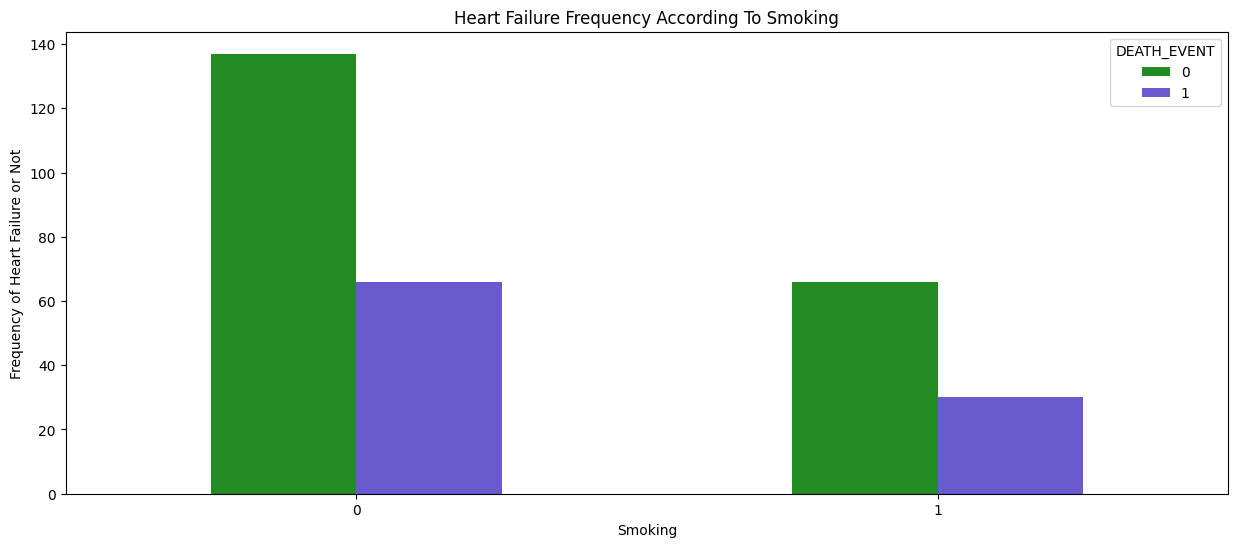

In [18]:
pd.crosstab(df.Smoking,df.DEATH_EVENT).plot(kind="bar",figsize=(15,6),color=['#228B22','#6A5ACD'])
plt.title('Heart Failure Frequency According To Smoking')
plt.xlabel('Smoking')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Heart Failure or Not')
plt.show()

# Creating Dummy **Variables**

In [19]:
a = pd.get_dummies(df['Diabetes'], prefix = "Diabetes")
b = pd.get_dummies(df['Anaemia'], prefix = "Anaemia")
c = pd.get_dummies(df['HighBP'], prefix = "HighBP")
d = pd.get_dummies(df['Smoking'], prefix = "Smoking")

In [20]:
frames = [df, a, b, c, d]
df = pd.concat(frames, axis = 1)
df.head()

,Age,Anaemia,CPK,Diabetes,EjectionFraction,HighBP,Platelets,Creatinine,Sodium,Gender,...,F/UPeriod,DEATH_EVENT,Diabetes_0,Diabetes_1,Anaemia_0,Anaemia_1,HighBP_0,HighBP_1,Smoking_0,Smoking_1
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,...,4,1,1,0,1,0,0,1,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,...,6,1,1,0,1,0,1,0,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,...,7,1,1,0,1,0,1,0,0,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,...,7,1,1,0,0,1,1,0,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,...,8,1,0,1,0,1,1,0,1,0


In [21]:
df = df.drop(columns = ['Diabetes', 'Anaemia', 'HighBP', 'Smoking'])
df.head()

,Age,CPK,EjectionFraction,Platelets,Creatinine,Sodium,Gender,F/UPeriod,DEATH_EVENT,Diabetes_0,Diabetes_1,Anaemia_0,Anaemia_1,HighBP_0,HighBP_1,Smoking_0,Smoking_1
0,75.0,582,20,265000.00,1.9,130,1,4,1,1,0,1,0,0,1,1,0
1,55.0,7861,38,263358.03,1.1,136,1,6,1,1,0,1,0,1,0,1,0
2,65.0,146,20,162000.00,1.3,129,1,7,1,1,0,1,0,1,0,0,1
3,50.0,111,20,210000.00,1.9,137,1,7,1,1,0,0,1,1,0,1,0
4,65.0,160,20,327000.00,2.7,116,0,8,1,0,1,0,1,1,0,1,0


# Creating Model for Logistic **Regression**

In [22]:
y = df.DEATH_EVENT.values
X = df.drop(['DEATH_EVENT'], axis = 1)

Normalize **Data**

In [23]:
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [25]:
#transpose matrices
X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T

In [26]:
#initialize
def initialize(dimension):

    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

In [27]:
def sigmoid(z):

    y_head = 1/(1+ np.exp(-z))
    return y_head

In [28]:
def forwardBackward(weight,bias,X_train,y_train):
    # Forward

    y_head = sigmoid(np.dot(weight.T,X_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / X_train.shape[1]

    # Backward
    derivative_weight = np.dot(X_train,((y_head-y_train).T))/X_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/X_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}

    return cost,gradients

In [29]:
def update(weight,bias,X_train,y_train,learningRate,iteration) :
    costList = []
    index = []

    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,X_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]

        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}

    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [30]:
def predict(weight,bias,X_test):
    z = np.dot(weight.T,X_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,X_test.shape[1]))

    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [31]:
def logistic_regression(X_train,y_train,X_test,y_test,learningRate,iteration):
    dimension = X_train.shape[0]
    weight,bias = initialize(dimension)

    parameters, gradients = update(weight,bias,X_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],X_test)

    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

iteration: 100
cost: 0.40821801869288143


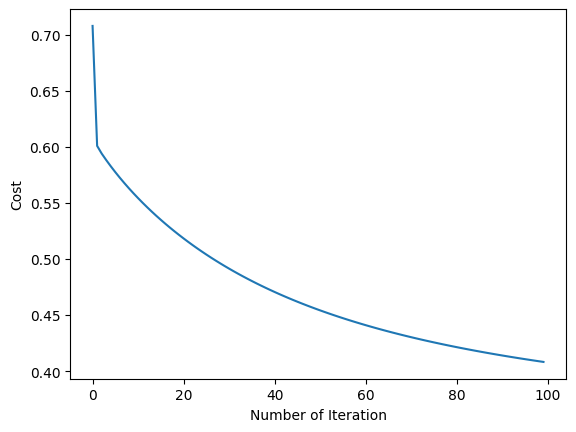

Manuel Test Accuracy: 78.33%


In [32]:
logistic_regression(X_train,y_train,X_test,y_test,1,100)

Sklearn Logistic **Regression**


In [33]:
accuracies = {}

lr = LogisticRegression()
lr.fit(X_train.T,y_train.T)
acc = lr.score(X_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 80.00%


# K-Nearest Neighbour (KNN) **Classification**

KNN **Algorithm**

In [34]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train.T, y_train.T)
prediction = knn.predict(X_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(X_test.T, y_test.T)*100))

2 NN Score: 66.67%


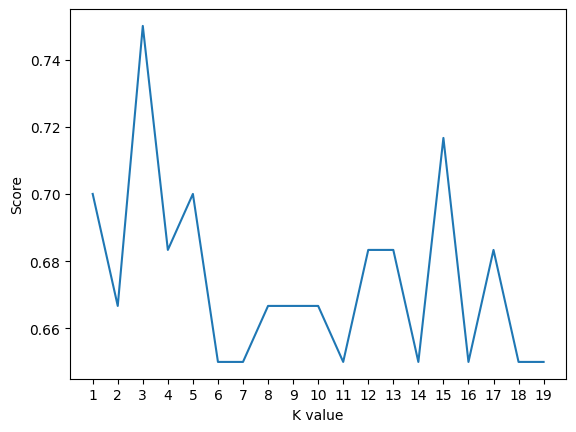

Maximum KNN Score is 75.00%


In [35]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train.T, y_train.T)
    scoreList.append(knn2.score(X_test.T, y_test.T))

plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

# Support Vector Machine (SVM) **Algorithm**

In [36]:
from sklearn.svm import SVC

In [37]:
svm = SVC(random_state = 1)
svm.fit(X_train.T, y_train.T)

acc = svm.score(X_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 73.33%


# Naive Bayes **Algorithm**

In [38]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train.T, y_train.T)

acc = nb.score(X_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 70.00%


# Decision Tree **Algorithm**

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train.T, y_train.T)

acc = dtc.score(X_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 76.67%


# Random Forest **Classification**

In [40]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train.T, y_train.T)

acc = rf.score(X_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 85.00%


# Comparing **Models**

<ipython-input-42-d2fd317b9313>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()),order={key:value for key, value in sorted(accuracies.items(), key=lambda x: x[1])}, palette=colors)


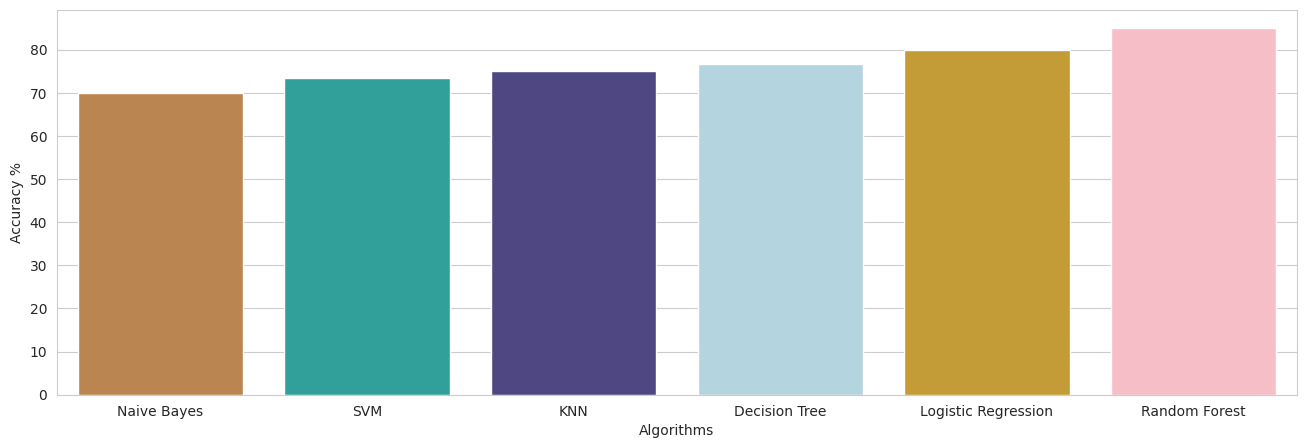

In [42]:
colors = ["#CD853F", "#20B2AA", "#483D8B", "#ADD8E6","#DAA520","#FFB6C1"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()),order={key:value for key, value in sorted(accuracies.items(), key=lambda x: x[1])}, palette=colors)
# plt.bar_label(ax.containers[0])
# ax.bar_label(accuracies.values(), label_type='center')
# show_values(ax)

# for index, value in list(accuracies.values()):
#     plt.text(value, index, str(value))

plt.show()


In [43]:
acc

85.0

# Confusion **Matrix**

In [44]:
# Predicted values
y_head_lr = lr.predict(X_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train.T, y_train.T)
y_head_knn = knn3.predict(X_test.T)
y_head_svm = svm.predict(X_test.T)
y_head_nb = nb.predict(X_test.T)
y_head_dtc = dtc.predict(X_test.T)
y_head_rf = rf.predict(X_test.T)

In [45]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)

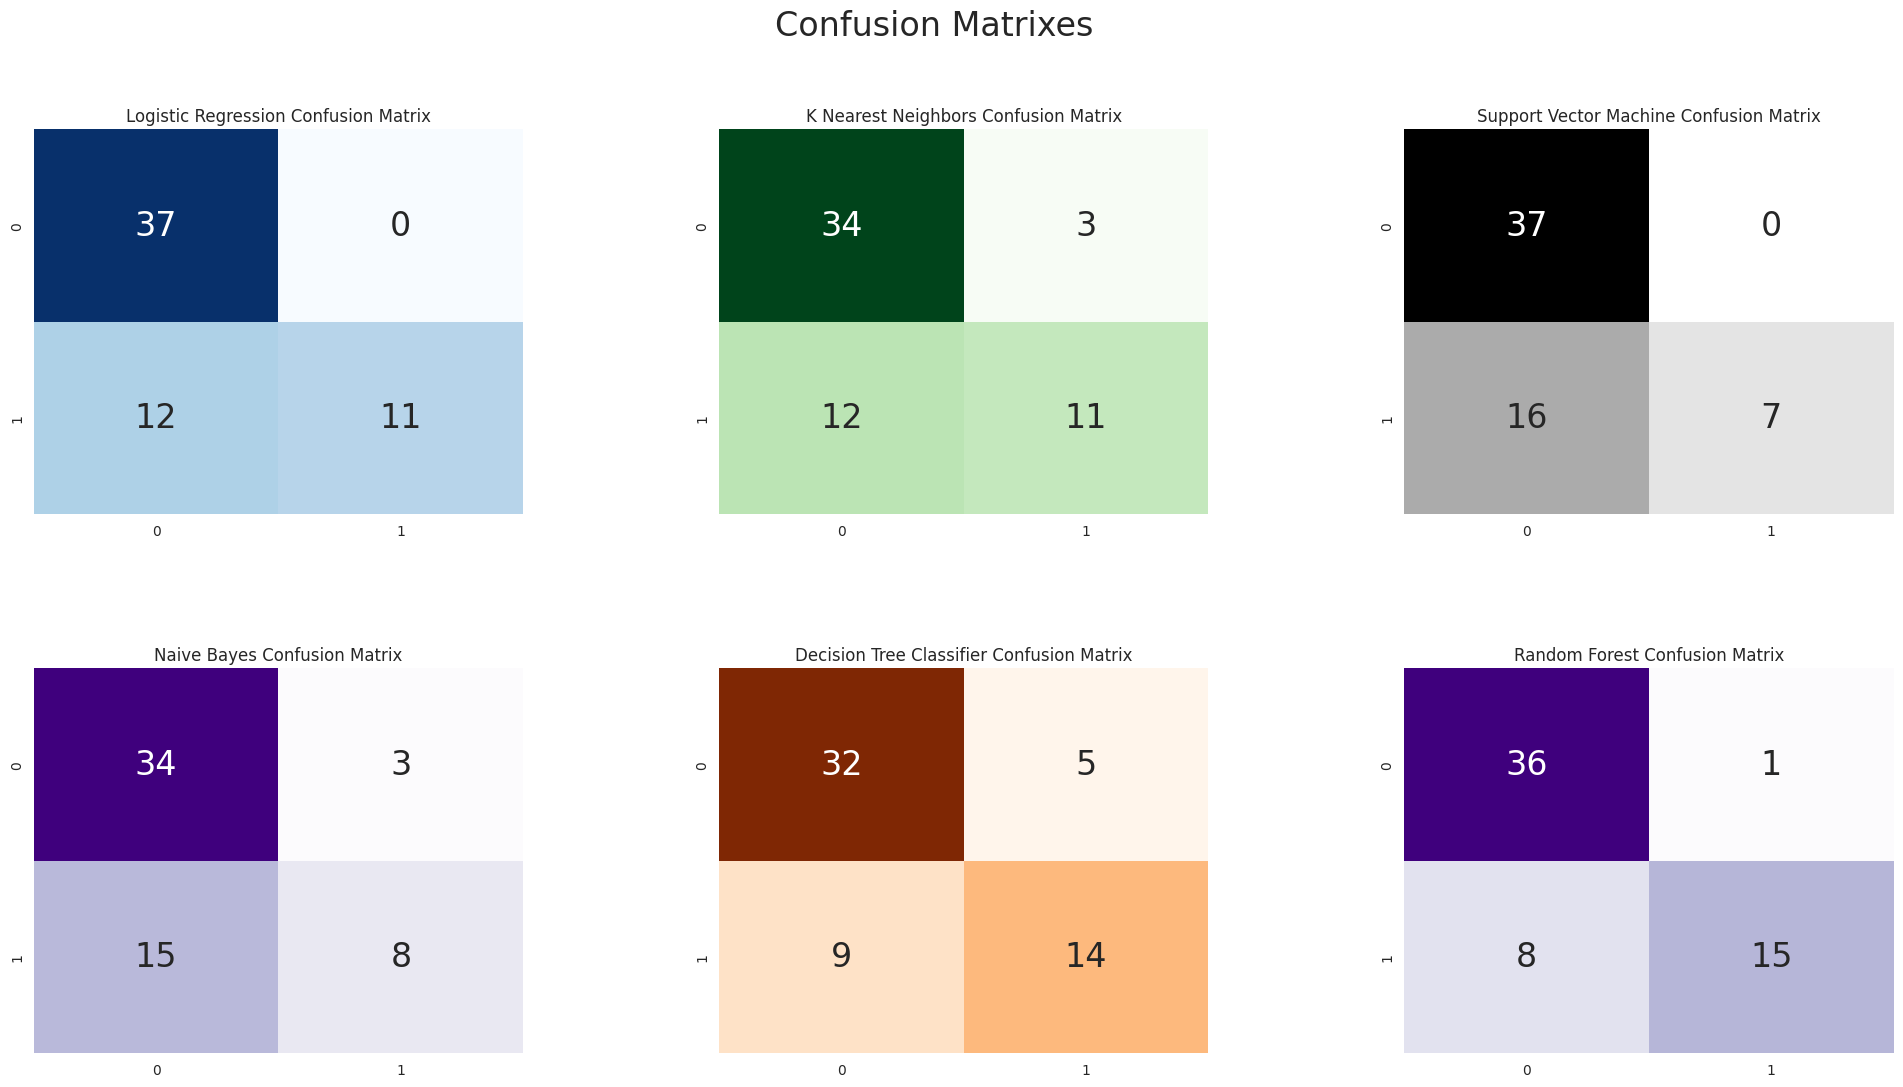

In [46]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Greys",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Purples",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Oranges",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Purples",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()